
# TMDb Movies a Dataset 

### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#eda">Question 1: Top 10 movies based on revenue</a></li>
<li><a href="#2">Question 2 : Top 10 director based on the vote_count</a></li>
<li><a href="#3">Question 3 : What is the relationship between Voteing and Popularity?</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

   In this presentation based on this dataset of TMDb Movies the questions will be answered . For example who are the most famous director?, What about the top 10 movies bassed on revenues, what is the relationship between voteing and popularity? 
   So Lets start exploring the dataset and Enjoying that.

In [4]:
### import statements 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>

# Data Wrangling


### Reading the Data

In [5]:
## Reding the data and tack a look on it 
df= pd.read_csv('tmdb-movies-data.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [136]:
## Checking which columns have missing value 
df= pd.read_csv('tmdb-movies-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

## Printing the Data Shape 

### In the Movie Data we have 10866 rows and 21 columns

In [13]:
## Looking on the data shape
df= pd.read_csv('tmdb-movies-data.csv')
df.shape

(10866, 21)

In [14]:
## To view the min, 25%, 50%, 75%, max and the mean for the data withe panda describe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


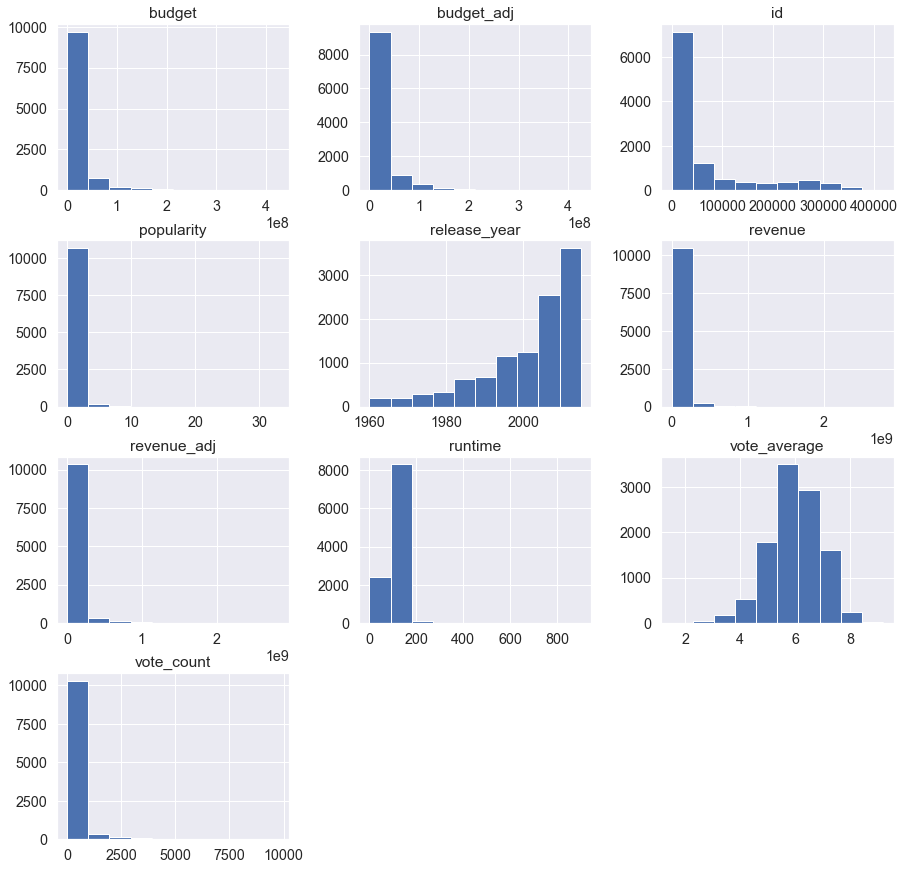

In [188]:
# Historam of the whole data frame
df.hist(figsize=(15,15));


# Data Cleaning 

### in my cleaning data i will fill in the messing data then, i will see if ther any duplicating and drop it.

In [16]:
## inplace the missing value by useing the mean 
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

## Check for duplicates in the data and drop it

In [6]:
## Fading if ther any dublicatss
sum(df.duplicated())

1

In [7]:
## Dropping the dublicate in the data
df.drop_duplicates(inplace=True) 

In [8]:
## Making shor that ther is no more dublicate in the data
sum(df.duplicated())

0

<a id='eda'></a>
# Exploratory Data Analysis

## Question 1: Top 10 movies based on revenue

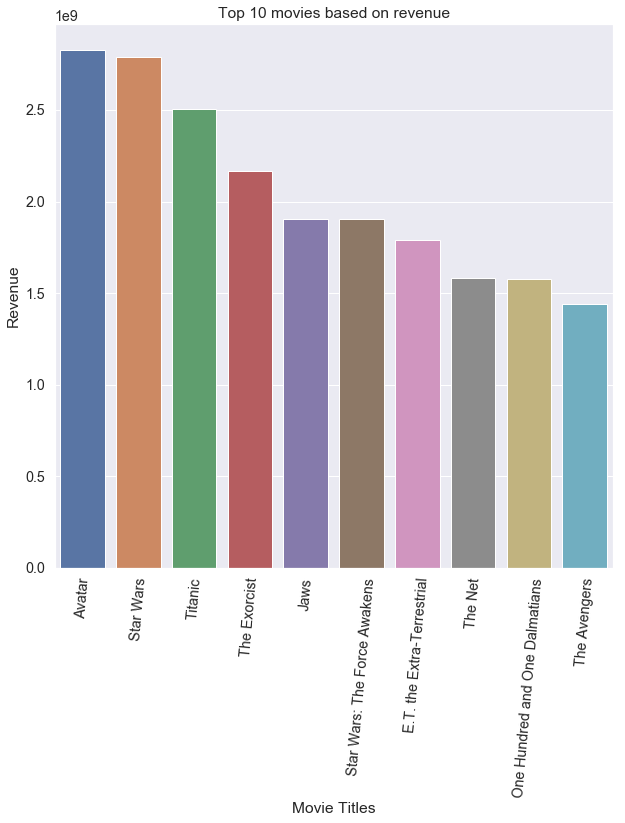

In [9]:
## Top movies based on revenue
revenue_dict = {}
## Choosing the 2 columns to fetching them
movies_and_revenue = df[["original_title", "revenue_adj"]] 
sns.set( rc = {'figure.figsize':(10,10)}, font_scale=1.3)
ax = sns.barplot(
    movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(10).original_title, 
    movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(10).revenue_adj)

for item in ax.get_xticklabels():
    item.set_rotation(85)
## Nameing the xlabel, ylabel and the title   
ax.set(xlabel='Movie Titles', ylabel='Revenue', title = 'Top 10 movies based on revenue')
plt.show()


<a id='2'></a>
## Question 2 : Top 10 director based on the vote_count

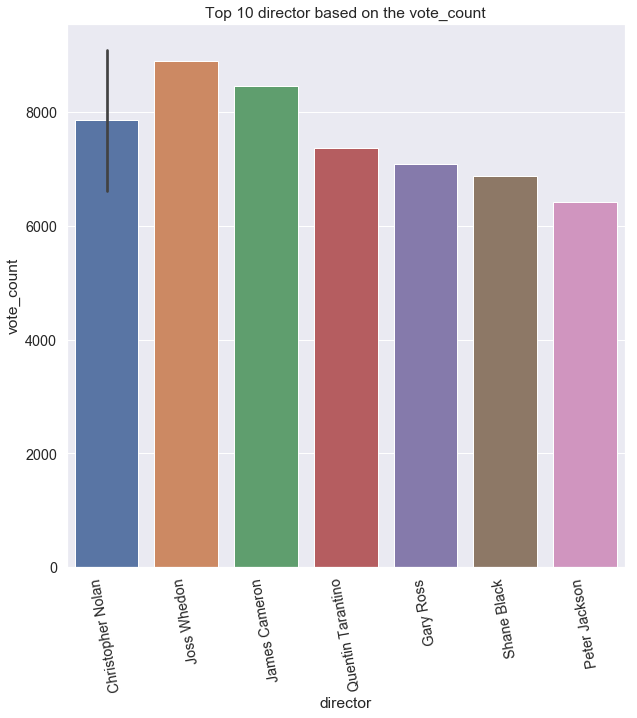

In [187]:
vote_count = {}
## Choosing the 2 columns to fetching them
director_and_vote_count = df[["director","vote_count"]]
sns.set( rc = {'figure.figsize':(10,10)}, font_scale=1.3)
ax = sns.barplot(
    director_and_vote_count.sort_values(by = "vote_count", ascending=False).head(10).director, 
    director_and_vote_count.sort_values(by = "vote_count", ascending=False).head(10).vote_count)

for item in ax.get_xticklabels():
    item.set_rotation(100)

## Nameing the xlabel, ylabel and the title 
ax.set(xlabel='director', ylabel='vote_count', title = 'Top 10 director based on the vote_count')
plt.show()



<a id='3'></a>
## Question 3 : What is the relationship between Voteing and Popularity?

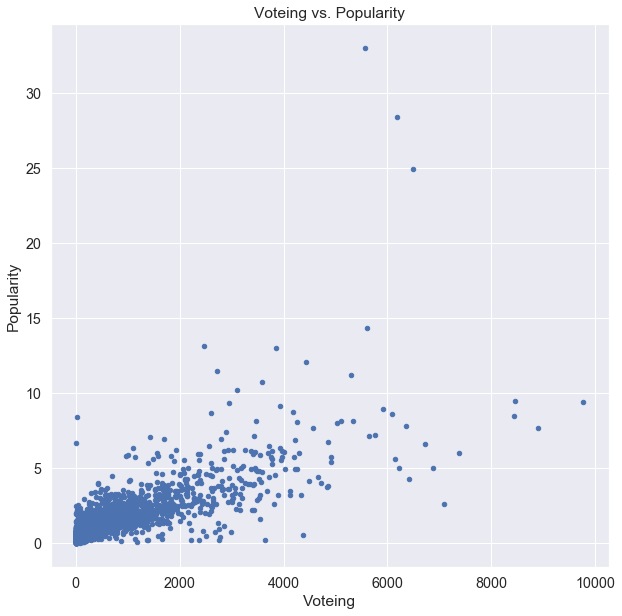

In [12]:
## Plot relationship between popularity and vote_count output
df.plot(x='vote_count', y='popularity', kind='scatter', figsize=(10,10))
plt.title('Voteing vs. Popularity')
plt.xlabel('Voteing')
plt.ylabel('Popularity');

<a id='conclusions'></a>
## Conclusions

   TMDb Movies Dataset is very rich in information,  and its has Around 10866 rows and 21 columns,  and we can see that there are some missing object data, and 1 duplicated data.
   After the Exploratory we can see that (AVATAR) Movie is the hiset revenue, and the director (Joos Whedon) top 1 between the the Top 10 directors based on voteing.  

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])